# Proyecto taller de ciencias de datos: Reducción de las falsas alarmas de arritmia en la UCI.
*Valentina Yañez*

Este proyecto tiene como objetivo el desarrollar un algoritmo para reducir la incidencia de falsas alarmas al momento de detectar arritmias potencialmente mortales en la Unidad de Cuidados Intensivos (UCI).

## 1. Objetivo del proyecto

- **Reducción de Alarmas Falsas**: El objetivo principal es desarrollar algoritmos que reduzcan la cantidad de alarmas falsas en la UCI, enfocándose en arritmias que amenazan la vida como asistolia, bradicardia extrema, taquicardia extrema, taquicardia ventricular y fibrilación ventricular. Se pueden usar hasta 30 segundos de datos después de la alarma.
- **Evaluación y Puntuación**: Las entradas se deben evaluar y puntuar automáticamente en un entorno de prueba. Se deben maximizar los verdaderos positivos y negativos, minimizando los falsos positivos y negativos. [3]

## 2. Contexto

Las falsas alarmas en la UCI pueden provocar una interrupción de la atención, afectando tanto al paciente como al personal clínico a través de perturbaciones acústicas, desensibilización a las advertencias y ralentización de los tiempos de respuesta, lo que lleva a una disminución de la calidad de la atención. [3]

Se utilizan datos de 1250 alarmas de arritmia en señales de unidades de monitorización de cuidados intensivos disparadas en base a diversos canales para monitoreo de ondas pulsátiles, como derivaciones ECG, presión arterial y fotoplestimografía [3]. Sin embargo, Los datos de alarmas se reparten en sólo 750 casos únicos. 
Fueron recopilados de cuatro hospitales en EE.UU. y Europa con tres fabricantes principales.

Los datos fueron recopilados de cuatro hospitales en EE.UU. y Europa con tres fabricantes principales [3] y se encuentran en formato '.hea' y '.mat' (Matlab).

Cada uno de los 750 registros contiene almenos una derivacion de ECG y una o más formas de onda pulsátiles (fotopletismograma y presión arterial) y han sido muestreados a 250 Hz. Los registros incluyen artefactos de marcapasos y otros ruidos. [3]

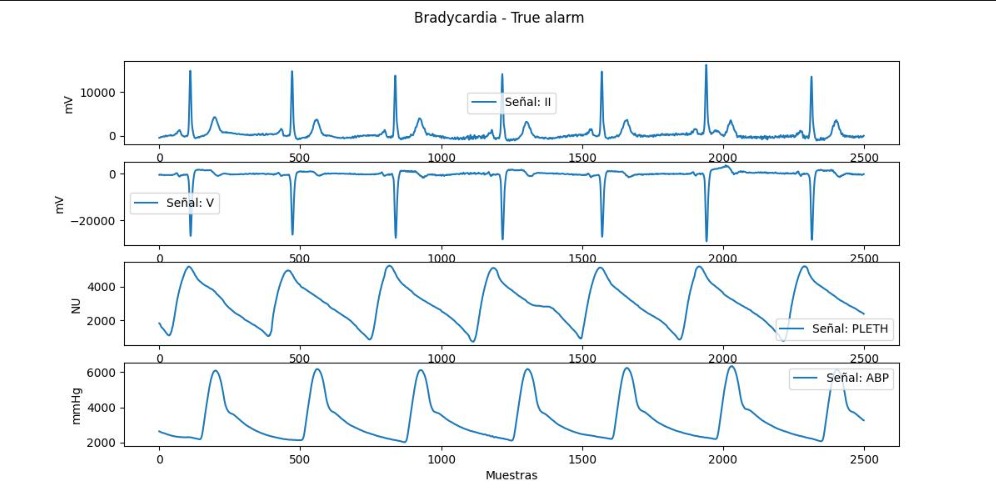

*Imagen representativa de los datos a evaluar*

#### 2.1 Definiciones importantes

**QRS**

El complejo QRS es una parte fundamental del electrocardiograma (ECG) que representa la despolarización de los ventrículos del corazón.

- **Despolarización Ventricular**: El complejo QRS muestra la actividad eléctrica que ocurre cuando los ventrículos del corazón se despolarizan, lo que lleva a su contracción.
- **Componentes**:
    - **Onda Q**: La primera onda negativa del complejo.
    - **Onda R**: La primera onda positiva.
    - **Onda S**: La onda negativa que sigue a la onda R.

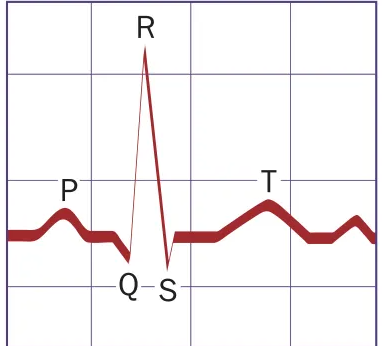

[4][5]

**Ondas pulsátiles**

son variaciones periódicas en la presión de los vasos sanguíneos, causadas por el bombeo del corazón. Estas ondas se pueden medir a través de diferentes métodos, como la **fotopletismografía (PPG)** o la **presión arterial**.

#### 2.2 Tabla tipos de canales de onda pulsátil presentes en los datos

| **Señal** | **Descripción** |
|-----------|------------------|
| **ABP (Arterial Blood Pressure)** | Mide la presión arterial en tiempo real, fundamental para el monitoreo cardiovascular. |
| **PLETH (Plethysmogram)** | Representa la variación del volumen sanguíneo en un lecho vascular, útil para evaluar la perfusión y la saturación de oxígeno. |
| **MCL (Modified Chest Lead)** | Derivación ECG que proporciona una visualización clara del ritmo cardíaco y ayuda en la detección de arritmias. |
| **II (Lead II)** | Una derivación estándar que mide la actividad eléctrica del corazón desde el brazo derecho a la pierna izquierda. |
| **V (Precordial Lead)** | Derivaciones colocadas en el tórax para obtener información detallada sobre la actividad eléctrica del corazón. |
| **aVR, aVL, aVF** | Derivaciones unipolares que ofrecen información sobre el eje eléctrico del corazón y son útiles en la evaluación de isquemia. |
| **RESP (Respiratory Rate)** | Mide la frecuencia respiratoria del paciente, crucial para evaluar su estado respiratorio. | 

[1][5]

#### 2.3 Tipos de arritmia consideradas

El problema solo se enfoca en algunas arritmias potencialmente mortales, a saber: asistolia, bradicardia extrema, taquicardia extrema, taquicardia ventricular y aleteo/fibrilación ventricular.

| Asistolia | Sin QRS durante al menos 4 segundos |
| --- | --- |
| Bradicardia extrema | Frecuencia cardíaca inferior a 60 lpm durante 5 latidos consecutivos |
| Taquicardia extrema | Frecuencia cardíaca superior a 140 lpm durante 17 latidos consecutivos |
| Taquicardia ventricular | 5 o más latidos ventriculares con frecuencia cardíaca superior a 100 lpm |
| Aleteo ventricular/Fibrilación | Fibrilatoria, aleteo o forma de onda oscilatoria durante al menos 4 segundos |

[2]

# 3. Plan de desarrollo del proyecto

3.1. **Preparación del Entorno**

    - Instalar en Python las bibliotecas necesarias: `numpy`, `pandas`, `scipy`, `matplotlib`, `wfdb`.
    - Descarga los datos de entrenamiento y prueba desde el sitio de PhysioNet.
3.2. **Exploración y Preprocesamiento de Datos**

    - Cargar los datos utilizando la biblioteca `wfdb`.
    - Realizar un análisis exploratorio de los datos para entender su estructura y contenido.
    - Aplicar filtros y técnicas de limpieza para eliminar el ruido y las señales no deseadas. (encoders)
3.3. **Desarrollo del Algoritmo**

    - Implementar un algoritmo utilizando técnicas de aprendizaje automático, como Random Forest o SVM.
    - Evalúar el rendimiento del algoritmo en el conjunto de datos de entrenamiento.
3.4. **Validación y Optimización**

    - Dividir los datos de entrenamiento en subconjuntos de validación cruzada.
    - Ajustar los hiper parámetros del modelo para mejorar su precisión y reducir los falsos positivos.
    - Implementar técnicas de validación cruzada para asegurar la robustez del modelo.
3.5. **Pruebas**

    - Probar el algoritmo en el conjunto de datos de prueba.

Cabe destacar que el plan de desarrollo corresponderá a un sólo tipo de anomalía (Bradicardia extrema), debido a que por falta de conocimiento previo se invirtió demasiado tiempo en investigación, ensayos de prueba y errores constantes, lo que dificultó el desarrollo completo del reto lamentablemente.













# 3.1 Preparación del entorno

In [1219]:
# Instalar bibliotecas necesarias
import wfdb
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import os
import pandas as pd
from scipy.signal import butter, filtfilt
from biosppy.signals import ecg
from biosppy.signals import ppg
from biosppy.plotting import plot_ecg
from biosppy.plotting import plot_ppg

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier



In [1220]:
#Función para limpiar carpetas
def limpiar_carpeta(carpeta):
    for file in os.listdir(carpeta):
        os.remove(carpeta+'/'+file)

limpiar_carpeta('data/cleaned')

In [1223]:
# Funciones de obtención de datos

def get_name_files(path,type):
    files = []
    for file in os.listdir(path):
        if file.endswith(type):
            files.append(file[:-4])
    return files

def read_file_hea(filename, path):
    # lee archivo .hea
    record = wfdb.rdheader(path+filename)
    return record

def read_file_mat(file, path):
    # carga archivo .mat (tiene las señales)
    mat_data = loadmat(path + file +'.mat')
    signals = mat_data['val']
    return signals

def read_file_flat(file,path):
    mat_data = loadmat(path + file +'.mat')
    if 'flatareas' in mat_data:
        flatareas = mat_data['flatareas']
    else:
        flatareas = np.array([])
    return flatareas

def read_file_zigzag(file,path):
    mat_data = loadmat(path + file +'.mat')
    if 'zigzagareas' in mat_data:
        zigzagareas = mat_data['zigzagareas']
    else:
        zigzagareas = np.array([])
    return zigzagareas

---

# 3.2 Análisis exploratorio de datos

In [1224]:

old_path='data/training/' #ruta de los archivos preliminares
#toma los nombres de los archivos .hea
nameFiles = get_name_files(old_path,'.hea')
#revisa el primer archivo .hea
heaRecord1 = read_file_hea(nameFiles[0], old_path)
print(heaRecord1.__dict__)

{'record_name': 'a103l', 'n_sig': 3, 'fs': 250, 'counter_freq': None, 'base_counter': None, 'sig_len': 82500, 'base_time': None, 'base_date': None, 'comments': ['Asystole', 'False alarm'], 'sig_name': ['II', 'V', 'PLETH'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'], 'fmt': ['16', '16', '16'], 'samps_per_frame': [1, 1, 1], 'skew': [None, None, None], 'byte_offset': [24, 24, 24], 'adc_gain': [7247.0, 10520.0, 12530.0], 'baseline': [0, 0, 0], 'units': ['mV', 'mV', 'NU'], 'adc_res': [16, 16, 16], 'adc_zero': [0, 0, 0], 'init_value': [-171, 9127, 6042], 'checksum': [-27403, -301, -17391], 'block_size': [0, 0, 0]}


In [1225]:
all_unique_sig_names = set()
for file in nameFiles:
    record = read_file_hea(file, old_path)
    all_unique_sig_names.update(record.sig_name)

print(f"Nombres de canal presentes: {all_unique_sig_names}")
print(f"Total de canales: {len(all_unique_sig_names)}")

Nombres de canal presentes: {'ABP', 'PLETH', 'MCL', 'II', 'V', 'aVR', 'III', 'I', 'aVF', 'aVL', 'RESP'}
Total de canales: 11


In [1226]:
# contar cuantos datos .mat hay en data/training
i=0
for file in os.listdir('data/training/'):
    if file.endswith('.mat'):
        i += 1
print('cantidad de datos:', i)

cantidad de datos: 750


## 3.2.1 Funciones de visualización

Se desarrollaron funciones de visualización para observar las caracteristicas de los datos de manera gráfica, junto con una recopilación en '.csv' de todos los archivos '.hea' de cada archivo para observar sus características disponible aquí [ExploraciónHea](data/exploraciónHea.csv)

Entre las funciones más útiles se encuentra 'graf_signals', con ella se exportó una gráfica de cada caso en formato '.jpg'. Los gráficos pueden encontrarse aquí [Gráficos de señal preliminar](data/imgs)

In [1227]:

def grafica_ecg(record, signals, path_save,picos_r=None): #subfunción de graf_signals
  
    plt.figure(figsize=(12, 6))
    for i in range(len(record.sig_name)):
        plt.subplot(len(record.sig_name), 1, i+1)
        plt.plot(signals[i, :], label=f'Señal: {record.sig_name[i]}')
        if picos_r is not None:
            plt.plot(picos_r, signals[i, picos_r], 'ro', markersize=1)
            #Imprime los picos_r
            print(f'Picos R señal {record.sig_name[i]}: {picos_r}')

        plt.xlabel('Muestras')
        plt.ylabel(record.units[i])
        plt.legend()

    plt.suptitle(record.comments[0] + ' - ' + record.comments[1])
  
    plt.savefig(path_save + record.record_name + '.jpg')
    plt.close()

#función para graficar una cantidad de señales/casos de un directorio de archivos .mat
def graf_signals(files, path, cant, path_save):
    for fileName in files[:cant]:
        print('Graficando señales de: ', fileName)
        record = read_file_hea(fileName, 'data/training/')
        signals, flat_areas, zigzag_areas = read_file_mat(fileName, path) 
        #picos_r = sio.loadmat(path +file+'.mat')['picos_r']
        grafica_ecg(record,signals, path_save)

# Grafica todos los canales de una señal/caso con sus areas planas y zigzag
def grafica_preview(record, signals, oldSignal, path, flat_areas=[], zigzag_areas=[]):
    plt.figure(figsize=(12, 6))
    for i in range(signals.shape[0]):
        plt.subplot(signals.shape[0], 1, i + 1)
        plt.plot(signals[i, :], label=f'Señal limpia: {record.sig_name[i]}', color='blue', alpha=0.5)
        plt.plot(oldSignal[i, :], label=f'Señal original: {record.sig_name[i]}', color='red', alpha=0.3)
        # Resaltar visualmente los segmentos planos si existen

        if  flat_areas.size > 0:
            for flat in flat_areas[0,i]:
                plt.axvspan(flat[0], flat[1], color='red', alpha=0.5)

        # Resaltar visualmente los segmentos zigzag si existen
        if zigzag_areas.size > 0:
            for zigzag in zigzag_areas[0,i]:
                plt.axvspan(zigzag[0], zigzag[1], color='yellow', alpha=0.5)
        
        plt.xlabel('Muestras')
        plt.ylabel(record.units[i])
        plt.legend()

    plt.suptitle(record.comments[0] + ' - ' + record.comments[1])
    plt.show()

#Grafica sólo canales ya procesados, mostrando sus picosR en caso de ecg, picos en caso de ppg y latidos cardiacos y complejo QRS
def grafica_preview_bios(record, signal):
    try:
        ecg_type = ['I', 'II', 'III', 'V']
        pleth_type = ['PLETH']
        for i in range(len(record.sig_name)):
            channel = signal[i, :]
            if record.sig_name[i] in ecg_type:
                ecg.ecg(signal=channel, sampling_rate=250, show=True)
            elif record.sig_name[i] in pleth_type:
                ppg.ppg(signal=channel, sampling_rate=250, show=True)
    except Exception as e:
        print(f'Señal {record.record_name} no válida para esta gráfica: {e}')


In [1232]:
# Visualizador general: Grafica toda la información útil de una señal
def visualizador_señales_en_file(nameFile_, path, old_path):
    nameFile = nameFiles.index(nameFile_) #nombre de la muestra
    record = read_file_hea(nameFiles[nameFile], old_path) #buscar . hea siempre será en old_path
    signalPreview = read_file_mat(nameFiles[nameFile], path)
    oldSignal = read_file_mat(nameFiles[nameFile], old_path)
    flat_areas = read_file_flat(nameFiles[nameFile], path)
    zigzag_areas = read_file_zigzag(nameFiles[nameFile], path)

    grafica_preview(record, signalPreview, oldSignal, path, flat_areas, zigzag_areas)
    grafica_preview_bios(record, signalPreview) #sólo para señales correctas

def visualizador_señales_limpias(record, signals):
    ecg_type = ['I', 'II', 'III', 'V']
    pleth_type = ['PLETH']
    print(record.comments[0] + ' - ' + record.comments[1])
    for i in range(len(record.sig_name)):
        print(record.sig_name[i])
        channel = signals[i, :]
        if record.sig_name[i] in ecg_type:
            a=ecg.ecg(signal=channel, sampling_rate=250, show=True)
        elif record.sig_name[i] in pleth_type:
            ppg.ppg(signal=channel, sampling_rate=250, show=True)


## 3.2.2 Limpieza de los datos

Gracias a las funciones de visualización se pueden observar caracteristicas importantes de la señal.

En primer lugar se observó estas no tenían una longitud estándar, muchas poseían ruido y no se identificaba a simple vista el complejo QRS.
Además muchos canales poseían líneas planas y en zigzag, lo que dificulta aún mas la detección de características.

Debido a esto se determina el siguiente plan de acción:
- Detección de lineas planas y zig_zag.
- Desarrollo de un filtro butterworth de paso bajo, con un cutoff=1 y order=2. [2]
- Clasificar datos válidos para entrenamiento y testing.

Se detallan a continuación funciones importantes:

**mark_flat_lines** : Marca líneas planas en la señal donde la diferencia entre valores consecutivos es menor que un umbral.

Parameteros:
- signal: La señal a analizar (ECG o PPG).
- fs: Frecuencia de muestreo en Hz.
- min_duration: Duración mínima en segundos para que se considere una línea plana.
- flat_value: El valor que se utilizará para marcar las líneas planas en la señal.
- threshold: Umbral de diferencia entre muestras consecutivas para considerar una línea plana.

Returns:
- marked_signal: La señal con las líneas planas marcadas.
- flat_areas: Lista de tuplas (inicio, fin) que indican las áreas planas detectadas.

**mark_zigzag_lines** :  Identifica segmentos en zigzag en una señal.
    
Parámetros:
- signal (numpy array): La señal a analizar.
- fs (int): Frecuencia de muestreo en Hz. Por defecto es 250 Hz.
- min_duration (float): Duración mínima en segundos de un zigzag. Por defecto es 0.2 segundos.

Retorna:
zigzag_areas (list): Lista de tuplas (inicio, fin) de los segmentos en zigzag.

Tanto 'min_duration' como 'threshold' fueron ajustados para detectar correctamente señales sin actividad necesaria, o de nula actividad.

In [1228]:

def mark_flat_lines(signal, fs=250, min_duration=0.3, flat_value=-9999, threshold=2):
    # Número de muestras consecutivas que definen una línea plana
    min_samples = int(min_duration * fs)

    # Diferencias absolutas entre muestras consecutivas
    diff_signal = np.abs(np.diff(signal))

    # Encuentra dónde la diferencia es menor que el umbral
    flat_segments = (diff_signal < threshold).astype(int)

    # Identifica segmentos planos continuos de al menos min_samples de duración
    flat_areas = []
    current_length = 0
    start_index = None

    for i in range(len(flat_segments)):
        if flat_segments[i] == 1:  # Si es un segmento plano
            if current_length == 0:
                start_index = i
            current_length += 1
        else:
            if current_length >= min_samples:  # Si cumple con la duración mínima
                flat_areas.append((start_index, start_index + current_length))
            current_length = 0

    # Considerar el último segmento si termina en una zona plana
    if current_length >= min_samples:
        flat_areas.append((start_index, start_index + current_length))

    # Marca los segmentos planos en la señal
    marked_signal = np.copy(signal)
    for start, end in flat_areas:
        marked_signal[start:end] = flat_value  # Marcar con un valor específico como -9999
    
    return marked_signal, flat_areas

def mark_zigzag_lines(signal, fs=250, min_duration=0.3):
    # Número de muestras consecutivas que definen un zigzag
    min_samples = int(min_duration * fs)
    
    # Calcula las diferencias entre muestras consecutivas (pendiente)
    diff_signal = np.diff(signal)
    
    # Determina si la pendiente es positiva o negativa
    sign_changes = np.sign(diff_signal)
    
    # Identifica los cambios de signo consecutivos (zigzag)
    zigzag_segments = (sign_changes[:-1] * sign_changes[1:] == -1).astype(int)

    # Identifica segmentos zigzag continuos de al menos min_samples de duración
    zigzag_areas = []
    current_length = 0
    start_index = None
    
    for i in range(len(zigzag_segments)):
        if zigzag_segments[i] == 1:  # Cambio de pendiente
            if current_length == 0:
                start_index = i
            current_length += 1
        else:
            if current_length >= min_samples:
                zigzag_areas.append((start_index, start_index + current_length + 1))
            current_length = 0

    # Último segmento
    if current_length >= min_samples:
        zigzag_areas.append((start_index, start_index + current_length + 1))
    
    return zigzag_areas

# filtro butterworth
def butter_bandpass_filter(data, cutoff=1, fs=250, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


### 3.2.2.1 Selección de datos válidos 

Para la clasificación de EBC, ETC y ASY, las señales
de ECG y PPG estaban presentes en todos los casos. [2]

En el caso de VFB y VTA, debería ser limitada
únicamente a las señales de ECG, ya que los datos de PPG eran muy
irregulares y no ayudaban a realizar ninguna predicción razonable. [2]

Con esta información, se determina que almenos un canal derivado de ECG debería tener una señal 'limpia', es decir, libre de líneas planas y zig-zag para poder extraer sus características QRS, latidos cardiacos y picos R. Con esta condición, ese caso en particular se considera válido. 

Con respecto a los canales 'PLETH' se determina más adelante si califican para considerar sus caracterísiticas, ya que depende del tipo de arritmia su utilización. 

Además de esto se crea directorio para los datos válidos ('data/cleaned')


In [1229]:

new_path = 'data/cleaned/'

if not os.path.exists(new_path):
    os.makedirs(new_path)
    
#se separan las señales calificadas y las no calificadas
for fileName in nameFiles:
    path = old_path
    record = read_file_hea(fileName, path)
    signals = read_file_mat(fileName, path)

    # Recorta y deja sólo los últimos 10 segundos de señal
    signals = signals[:, -record.fs*20:]
    dirtySignals = signals

    # Se aplica filtro sólo a las señales ECG ('I', 'II', 'III' y 'V')
    ecg_type = ['I', 'II', 'III', 'V']
    flat_areas_all = []
    zigzag_areas_all = []

    my_ecg = []
    strike = 0

    try:
        for i in range(len(record.sig_name)):
            if record.sig_name[i] in ecg_type and record.sig_name[i] not in my_ecg:
                my_ecg.append(record.sig_name[i])
                
        for i in range(len(record.sig_name)):

            if record.sig_name[i] in ecg_type:
                
                flat_signal, flat_areas0 = mark_flat_lines(signals[i, :], fs=record.fs)
                zigzag_areas0 = mark_zigzag_lines(signals[i, :], fs=record.fs)

            if len(flat_areas0) != 0 or len(zigzag_areas0) != 0:
                strike = strike + 1

        if strike >= len(my_ecg):
            raise Exception('Señal no califica para ser del training, no contiene ecg limpias'.format(fileName))

        else:
            sio.savemat(new_path + fileName + '.mat', {
            'val': signals,
            })

            print('se guardó la señal ', fileName, ' en el directorio cleaned')

    except Exception as e:
        print(f'Señal corrupta {fileName}: {e}')
        print(f'Señal no califica para ser del training {fileName} se descarta todo su archivo')

        
        
# se elimino 'v846s' de forma manual ya que saltó el filtro de líneas planas-zigzag y posee anomalías
os.remove('data/cleaned/v846s.mat')



se guardó la señal  a103l  en el directorio cleaned
se guardó la señal  a104s  en el directorio cleaned
se guardó la señal  a105l  en el directorio cleaned
se guardó la señal  a109l  en el directorio cleaned
Señal corrupta a123l: Señal no califica para ser del training, no contiene ecg limpias
Señal no califica para ser del training a123l se descarta todo su archivo
Señal corrupta a134s: Señal no califica para ser del training, no contiene ecg limpias
Señal no califica para ser del training a134s se descarta todo su archivo
se guardó la señal  a142s  en el directorio cleaned
se guardó la señal  a145l  en el directorio cleaned
Señal corrupta a152s: Señal no califica para ser del training, no contiene ecg limpias
Señal no califica para ser del training a152s se descarta todo su archivo
se guardó la señal  a161l  en el directorio cleaned
se guardó la señal  a163l  en el directorio cleaned
se guardó la señal  a165l  en el directorio cleaned
se guardó la señal  a167l  en el directorio clean

In [1230]:
# Se revisa cuántas señales se guardaron en el directorio cleaned
i=0
for file in os.listdir('data/cleaned/'):
    if file.endswith('.mat'):
        i += 1
print('cantidad de datos válidos para training:', i)

cantidad de datos válidos para training: 655


Una vez se tienen los datos válidos se corroboran sus características, cabe destacar que aún no están limpios

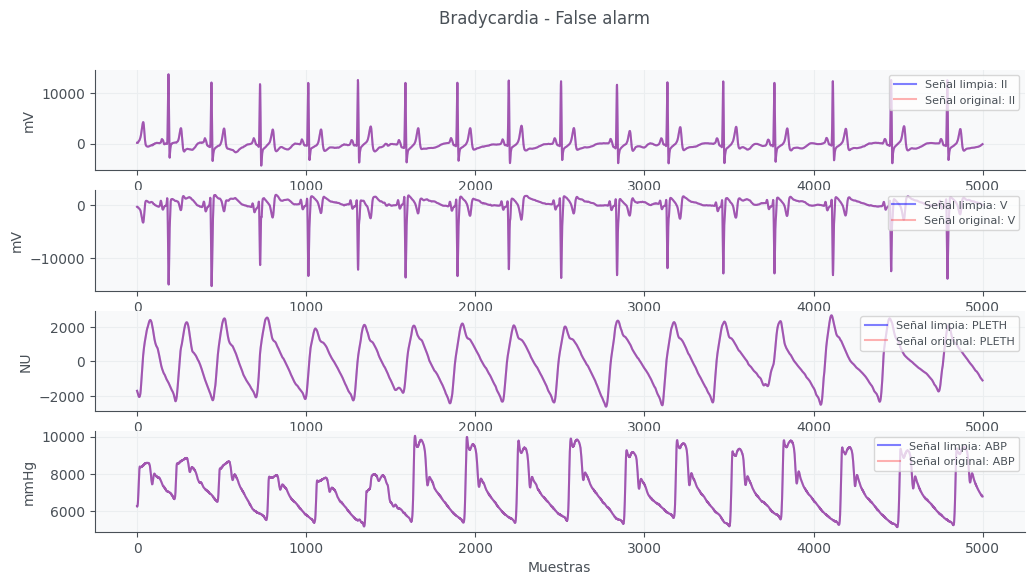

In [1231]:
# graficar una señal limpia
fileName = 'b388s'
path = 'data/cleaned/'
record = read_file_hea(fileName, 'data/training/')
signals = read_file_mat(fileName, path)
flat_areas = read_file_flat(fileName, path)
zigzag_areas = read_file_zigzag(fileName, path)
grafica_preview(record, signals, signals, path, flat_areas, zigzag_areas)


Bradycardia - False alarm
II


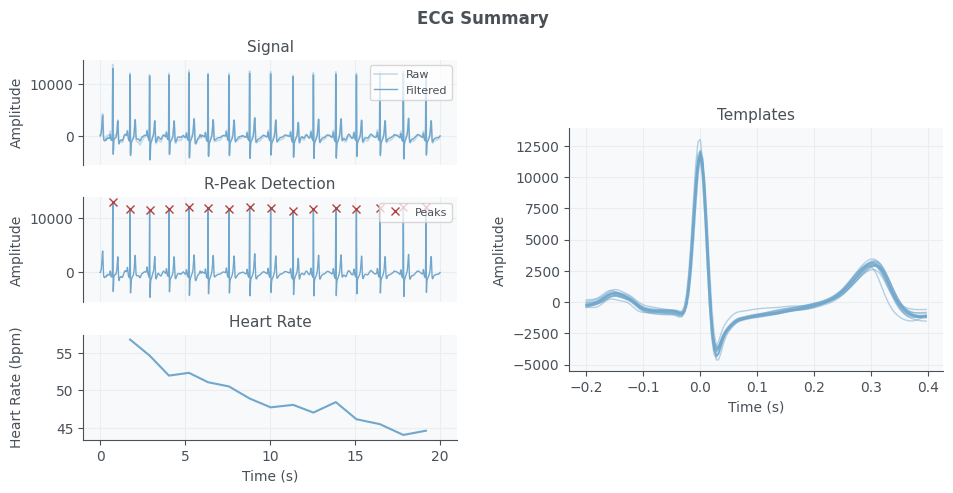

V


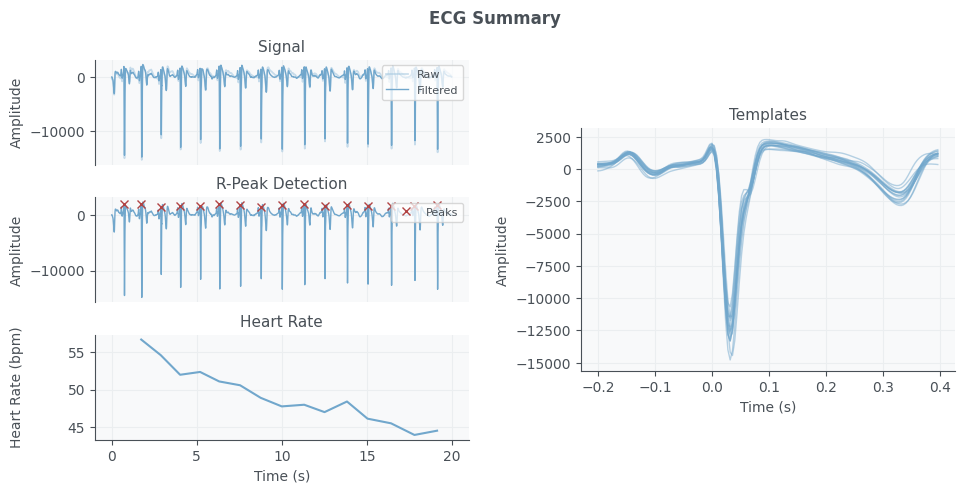

PLETH


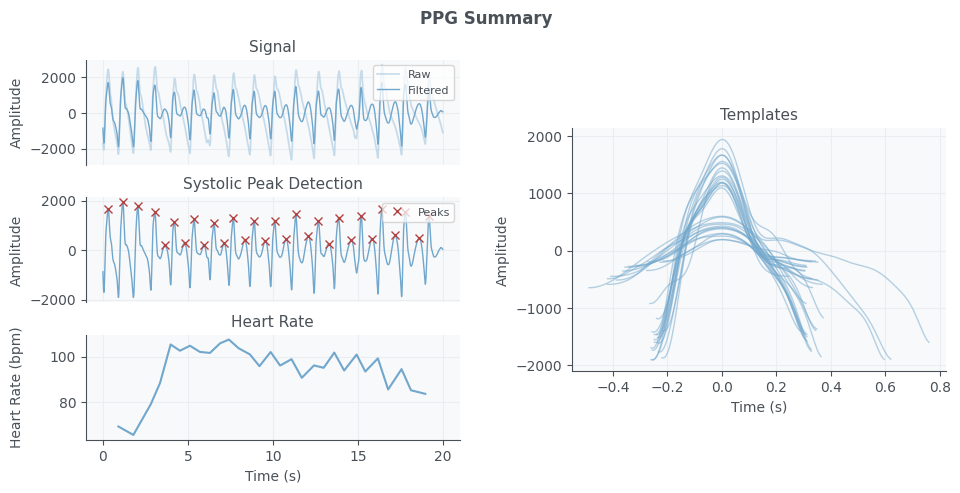

ABP


In [1233]:
visualizador_señales_limpias(read_file_hea(fileName, 'data/training/'), read_file_mat(fileName, path))

### 3.2.2.2 Preparación de los datos calificados


**Limpieza de los datos válidos** 

Los canales considerados para el análisis, sólo corresponden a derivaciones ECG y PPG, por lo que son los únicos que se van a analizar.

Se utiliza la librería [Biosspy](https://biosppy.readthedocs.io/en/stable/) para la limpieza, normalización de los datos y extracción de características, junto con un filtro de paso de banda. Posterior a esto se extraen las caracteristicas de cada caso y se guardan los canales ECG y PPG en un vector de canales

In [1234]:
from scipy.signal import savgol_filter

# retorna los datos necesarios y limpios de cada caso
def biosppy_cases_data(new_path, old_path, nameFiles):

    data_cases = []
    
    for fileName in nameFiles:

        signals = read_file_mat(fileName, new_path)
        record = read_file_hea(fileName, old_path)

        # Se aplica filtro sólo a las señales ECG ('I', 'II', 'III' y 'V') y PLETH
        ecg_type = ['I', 'II', 'III', 'V']
        pleth_type = ['PLETH']
        
        allSignals = []
        
        channel_type = []
        anomaly_type= record.comments[0]
        alarm_veracity = record.comments[1]

        min_heart_rate_pleth = 0
        max_heart_rate_pleth = 0
        min_heart_rate_ecg = 0
        max_heart_rate_ecg = 0

        for i in range(len(record.sig_name)): 
            ecg_if = (record.sig_name[i] in ecg_type)
            pleth_if = (record.sig_name[i] in pleth_type)
            if ecg_if or pleth_if:
                
                if ecg_if:
                    try:
                        channel = signals[i, :]
                        butterFilter = butter_bandpass_filter(channel, cutoff=1, fs=250, order=2)
                        channel = channel - butterFilter
                        
                        channel = ecg.ecg(signal=channel, sampling_rate=250, show=False)
                        channel_type = record.sig_name[i]

                        heart_rate_ecg = channel['heart_rate']

                        if heart_rate_ecg.any() and min_heart_rate_ecg == 0:
                            min_heart_rate_ecg = min(heart_rate_ecg)
                        if heart_rate_ecg.any() and max_heart_rate_ecg == 0:
                            max_heart_rate_ecg = max(heart_rate_ecg)
                            
                        allSignals.append([channel, channel_type])
                    except Exception as e:
                        print(f'canal {record.sig_name[i]} en señal {fileName} no válido para biosppy: {e}')
                    
                elif pleth_if:
                    
                    try:

                        channel = signals[i, :]
                        channel = ppg.ppg(signal=channel, sampling_rate=250, show=False)
                        
                        filtered_channel = channel['filtered']
                        channel_type = record.sig_name[i]

                        peaks = channel['peaks']
                        heart_rate_pleth = channel['heart_rate']

                        if heart_rate_pleth.any():
                            min_heart_rate_pleth = min(heart_rate_pleth)
                        if heart_rate_pleth.any():
                            max_heart_rate_pleth= max(heart_rate_pleth)

                        allSignals.append([channel, channel_type])

                    except Exception as e:
                        print(f'canal {record.sig_name[i]} en señal {fileName} no válido para biosppy: {e}')
        data_cases.append({'fileName:': fileName, 'channels': allSignals,'alarm_veracity': alarm_veracity, 'anomaly_type': anomaly_type, 'max_heart_rate_ecg': max_heart_rate_ecg, 'min_heart_rate_ecg': min_heart_rate_ecg, 'max_heart_rate_pleth': max_heart_rate_pleth, 'min_heart_rate_pleth': min_heart_rate_pleth})

    return data_cases


In [1235]:

new_path = 'data/cleaned/'
nameFiles = get_name_files(new_path,'.mat')


all_unique_comments_anomaly = set()
for file in nameFiles:
    record = read_file_hea(file, old_path)
    all_unique_comments_anomaly.update(record.comments[0].split())

print(f"Tipos de arritmia presentes: {all_unique_comments_anomaly}")
print(f"Total: {len(all_unique_comments_anomaly)}")

        

Tipos de arritmia presentes: {'Asystole', 'Ventricular_Flutter_Fib', 'Tachycardia', 'Ventricular_Tachycardia', 'Bradycardia'}
Total: 5


# 3.3 Desarrollo de algoritmos


Se puede observar que al limpiar la señal, se descartan las señales PLETH y ECG que, o no poseen suficientes pulsos para detectar el ritmo cardiaco o poseen anomalías en su señal que no permiten extraer sus características incluso con los filtros aplicados.
Luego se convierten las señales válidas en un DataFrame de la librería [Pandas](https://pandas.pydata.org) 



In [1032]:

data_cases = biosppy_cases_data(new_path, old_path, nameFiles)
data_cases = pd.DataFrame(data_cases)


canal PLETH en señal a185l no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal a372s no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal II en señal a699l no válido para biosppy: Not enough beats to compute heart rate.
canal PLETH en señal b387l no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal f450s no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal v181l no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal v258s no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal v399l no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal v448s no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal v460s no válido para biosppy: index 0 is out of bounds for axis 0 with size 0
canal PLETH en señal 

In [ ]:

data_cases



,fileName:,channels,alarm_veracity,anomaly_type,max_heart_rate_ecg,min_heart_rate_ecg,max_heart_rate_pleth,min_heart_rate_pleth
0,a103l,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Asystole,131.209359,122.207487,134.906760,90.719427
1,a104s,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Asystole,141.534392,68.412468,131.605955,108.133433
2,a105l,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Asystole,134.732947,133.138432,151.502952,70.223670
3,a109l,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Asystole,67.615739,55.351068,0.000000,0.000000
4,a142s,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,True alarm,Asystole,130.835973,106.710343,123.048083,73.653664
...,...,...,...,...,...,...,...,...
650,v842s,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,True alarm,Ventricular_Tachycardia,127.685972,79.104246,0.000000,0.000000
651,v843l,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Ventricular_Tachycardia,166.904859,73.409852,76.056196,72.478331
652,v844s,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,True alarm,Ventricular_Tachycardia,136.363636,59.607843,0.000000,0.000000
653,v845l,[[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...,False alarm,Ventricular_Tachycardia,130.072953,96.220563,0.000000,0.000000


Se establece una función extra para visualizar las señales limpias con todas sus características importantes de un sólo parámetro

In [1237]:
def visualizador_df_signals(channel):
    ecg_type = ['I', 'II', 'III', 'V']
    pleth_type = ['PLETH']
    print(channel['alarm_veracity'] + ' - ' + channel['anomaly_type'])
    if channel['channel_type'] in ecg_type:
        ecg.ecg(signal=channel['channel'], sampling_rate=250, show=True)
    elif channel['channel_type'] in pleth_type:
        ppg.ppg(signal=channel['channel'], sampling_rate=250, show=True)


### 3.3.2 Algoritmos de aprendizaje para detectar Bradicardia extrema

La bradicardia se considera cuando la frecuencia cardíaca es inferior a 60 lpm. En casos extremos, puede llegar a ser significativamente más baja, lo que puede comprometer la circulación sanguínea y provocar síntomas graves como mareos, desmayos y dificultad para respira. [6][2]

Para detectar bradicardia es importante determinar el valor mínimo de ritmo cardiaco, que se extraen de alguna de las derivaciones ECG y ser guardan en la variable  “min_ebpm”, siendo el canal 'II' el más exacto y el priorizado en este caso. Observando [ExploraciónHea.csv](data/exploración.hea) es el primero en las etiquetas por lo que será el primero en evaluarse. También será considerado el ritmo cardiaco mínimo de canales PPG o PLETH guardadas en la variable “min_pbpm”. [2][7]

Los Algortimos escogidos corresponen a SVM y RandomForest, esto debido a que están basados en vectores de características, en este caso el ritmo cardiaco mínimo detectado en la señal.

   fileName:                                           channels  \
0      b124s  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
1      b125l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
2      b126s  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
3      b183l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
5      b187l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
..       ...                                                ...   
57     b685l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
58     b703l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
63     b753l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
67     b824s  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   
72     b841l  [[([0.0000e+00 4.0000e-03 8.0000e-03 ... 1.998...   

   alarm_veracity anomaly_type  max_heart_rate_ecg  min_heart_rate_ecg  \
0      True alarm  Bradycardia           61.894455           54.391932   
1      True alarm  Bradycardia           68.742

<Axes: xlabel='min_heart_rate_ecg', ylabel='min_heart_rate_pleth'>

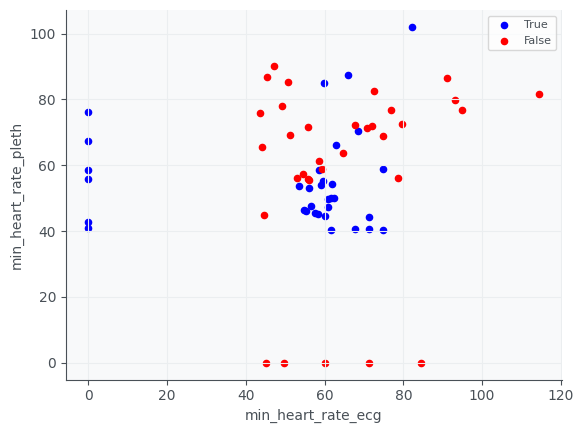

In [ ]:
#extraer datos de bradicardia
brady_cases = pd.DataFrame()

brady_cases = data_cases[data_cases['anomaly_type'] == 'Bradycardia']
brady_cases = brady_cases.reset_index(drop=True)

# brady_cases['alarm_veracity'].value_counts()

b_true = brady_cases[brady_cases['alarm_veracity'] == 'True alarm'][0:33]
b_false = brady_cases[brady_cases['alarm_veracity'] == 'False alarm'][0:33]

b_train = pd.concat([b_true, b_false])


print(b_train)
print(b_train['alarm_veracity'].value_counts())
#agregar el filename a cada punto del plot

axes = b_true.plot(kind='scatter', x='min_heart_rate_pleth', y='min_heart_rate_ecg', color='blue', label='True')
b_false.plot(kind='scatter', x='min_heart_rate_ecg', y='min_heart_rate_pleth', color='red', label='False', ax=axes)

# for i, txt in enumerate(b_true['fileName:']):
#     axes.annotate(txt, (b_true['min_heart_rate_pleth'].iat[i], b_true['min_heart_rate_ecg'].iat[i]), fontsize=8)

# for i, txt in enumerate(b_false['fileName:']):
#     axes.annotate(txt, (b_false['min_heart_rate_ecg'].iat[i], b_false['min_heart_rate_pleth'].iat[i]), fontsize=8)


Se observan en el gráfico tendencias interesantes, en el caso de el ritmo cardiaco mínimo de ECG, que no posee una medida en pleth, se califica como una falsa alarma. Por el contrario casos que sólo poseen medida de latido cardiaco mínimo en PLETH y no en ECG suelen ser verdaderos.

### SVM aplicación lineal básica

Se aplica el algoritmo SVM que busca encontrar el mejor hiperplano que separa diferentes clases en un espacio multidimensional. Su objetivo es maximizar el margen entre las clases, lo que significa que intenta crear la mayor distancia posible entre los puntos más cercanos de cada clase y el hiperplano de separación.

In [1166]:
feature_df= b_train[['min_heart_rate_ecg', 'min_heart_rate_pleth']]
X = np.asarray(feature_df)
y= np.asarray(b_train['alarm_veracity'])
#dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape

print(X_train.shape)

classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test) 

print(classification_report(y_test, y_predict))


(52, 2)
              precision    recall  f1-score   support

 False alarm       0.50      0.40      0.44         5
  True alarm       0.70      0.78      0.74         9

    accuracy                           0.64        14
   macro avg       0.60      0.59      0.59        14
weighted avg       0.63      0.64      0.63        14



La predicción en este caso no es muy buena para detectar falsas alarmas, esto puede ser debido a la dispersión de los datos de entrenamiento o a una mala elección en el modelo, ya que no se considera la señal en si como un parámetro.
El uso de un kernel gaussiano y no lineal podría acertar más la predicción, no fue aplicado por cuestiones de tiempo, sin embargo es la opción recomendable [2]

## Random Forest

In [1164]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=1)
clf.fit(X_train, y_train)

# Predict using the test data
y_predict = clf.predict(X_test)

print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

 False alarm       0.67      0.67      0.67         3
  True alarm       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



En caso de Random Forest mejoran los puntajes de precición, esto debe ser porque tiene mejor capacidad de clasificación por generalización, y, observando este caso en concreto, las caracterísitcas no siguen un sólo patrón, además de que muchas muestras se encontraban superpuestas o demasiado cerca la una de la otra.


**Justificación de las métricas**

1. Precisión

La precisión mide la proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP). En el contexto de un problema con alarmas (falsas y verdaderas), una alta precisión indica que cuando el modelo predice una "alarma verdadera", es probable que sea correcta. Esto es crucial en aplicaciones donde las falsas alarmas pueden tener costos altos, como en sistemas de seguridad o diagnósticos médicos.[8]

2. Recall

El recall, o sensibilidad, mide la proporción de verdaderos positivos sobre el total de casos positivos reales (TP + FN). Esta métrica es esencial cuando es más importante detectar todos los casos positivos, incluso a costa de aumentar las falsas alarmas. Por ejemplo, en un sistema de detección de fraudes, perder un caso positivo (falso negativo) podría resultar costoso. Un alto recall asegura que la mayoría de los casos relevantes sean capturados.[8]

3. F1-Score

El F1-score es la media armónica entre precisión y recall. Esta métrica se utiliza cuando se necesita un balance entre ambas. En situaciones donde hay un desbalance entre clases (por ejemplo, muchas más "alarmas verdaderas" que "falsas alarmas"), el F1-score proporciona una evaluación más equilibrada del rendimiento del modelo que simplemente mirar la precisión o el recall por separado. Un F1-score bajo puede indicar que el modelo no está capturando adecuadamente la clase positiva o está generando demasiadas falsas alarmas.[8]

# Conclusiones


Random Forest presenta un rendimiento superior en términos de precisión, recall, F1-score y exactitud en comparación con SVM. Esto sugiere que Random Forest es más efectivo para manejar el problema específico, especialmente en la identificación de ambas clases.
Random Forest muestra un mejor equilibrio entre la identificación de falsas y verdaderas alarmas, lo que es crucial en aplicaciones donde tanto las falsas alarmas como las verdaderas deben ser gestionadas adecuadamente.
Dado su mejor desempeño general, Random Forest podría ser más adecuado para aplicaciones prácticas donde se requiere una alta precisión en la clasificación y una buena capacidad de generalización.
Aunque Random Forest ha demostrado ser más efectivo en este caso, es importante considerar la posibilidad de ajustar hiperparámetros o explorar técnicas adicionales (como el uso de técnicas de balanceo de clases) para mejorar aún más el rendimiento del modelo SVM si se decide utilizarlo.

Los resultados sugieren que Random Forest es una buena opción para este problema específico, proporcionando un mejor equilibrio entre precisión y recall, así como una mayor exactitud general en comparación con SVM.

# Citas

[1] http://scielo.sld.cu/scielo.php?pid=S1684-18592018000100005&script=sci_arttext
[2] https://www.cinc.org/archives/2015/pdf/0733.pdf
[3] https://physionet.org/content/challenge-2015/1.0.0/
[4] https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/qrs-complex
[5] https://www.siacardio.com/wp-content/uploads/2015/01/Libro-EKG-y-Arritmias-WU.pdf
[6] https://www.shaio.org/bradicardia
[7] https://www.ifi.uzh.ch/dam/jcr:88645ffa-e895-4f05-b0e0-9260cd097cda/ReportMScProjektMargolisThaqiEsati.pdf
[8] https://klu.ai/glossary/accuracy-precision-recall-f1